# Import Modules

In [1]:
import cv2
import imageio

import numpy as np
import matplotlib.pyplot as plt

from skimage import exposure

***
# Initialize and load original image

## - JPG Format

In [2]:

# raw_image = imageio.imread('../images/jpg/fair_attraction.jpg')
# raw_image = imageio.imread('../images/jpg/mountain.jpg')

## - PNG Format

In [47]:
raw_image = imageio.imread('../images/png/dice.png')
# raw_image = imageio.imread('../images/png/penguin.png')

## - Gray Format

In [48]:
# raw_image = imageio.imread('../images/gray/stinkbug.png')
# raw_image = imageio.imread('../images/gray/mri.png')

***
# Display original image and description

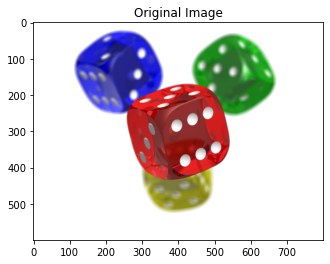

Height        : 600 pixels
Width         : 800 pixels
Color channel : 4 (RGBA)


In [49]:
plt.imshow(raw_image)
plt.title('Original Image')
plt.show()

print(f'Height        : {raw_image.shape[0]} pixels')
print(f'Width         : {raw_image.shape[1]} pixels')

if len(raw_image.shape) >= 3:
    if raw_image.shape[2] == 4:
        print(f'Color channel : {raw_image.shape[2]} (RGBA)')
    elif raw_image.shape[2] == 3:
        print(f'Color channel : {raw_image.shape[2]} (RGB)')

***
# Display original image histogram

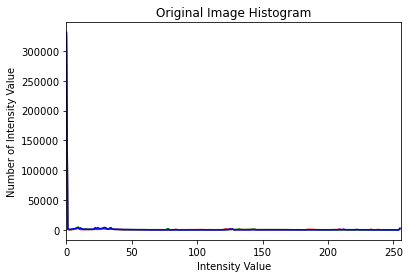

In [50]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([raw_image], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()

***
# Show list value each pixel

In [51]:
raw_image

Array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

***
# Logarithmic transformation

- Formula, sebagai berikut <b>s = c * log(1 + r)</b>
- <b>c</b> adalah kontanta yang didapatkan melalui formula, berikut <b>255 / log(1 + m)</b>
- <b>m</b> adalah nilai piksel tertinggi dari gambar yang digunakan sebagai input.
- Nilai piksel yang berada pada rentang terang yang jumlah kecil akan ditingkatkan nilainya, sehingga menjadi lebih terlihat.

### - Calculate constant

In [52]:
c = 255 / (np.log(1 + np.max(raw_image)))

print(f'Max value pixel from image : {np.max(raw_image)}')
print(f'Constant value             : {c}')

Max value pixel from image : 255
Constant value             : 45.98590442833571


### - Calculate logarithmic transformation

In [53]:
log_transformed = c * np.log(255 + raw_image)

<ipython-input-53-f391fd524d68>:1: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(255 + raw_image)


### - Specify the data type

In [54]:
log_transformed = np.array(log_transformed, dtype=np.uint8)

### - Show value of log_transformed variable

In [55]:
log_transformed

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

### - Display image with logarithmic transformation

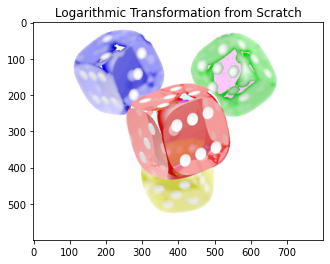

In [56]:
plt.imshow(log_transformed)
plt.title('Logarithmic Transformation from Scratch')
plt.show()

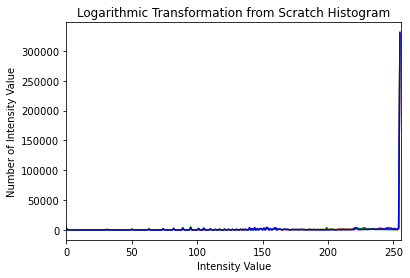

In [57]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([log_transformed], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Logarithmic Transformation from Scratch Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()

***
# With image processing module

### - Logarithmic transformation image with scikit-image module

Menggunakan nilai konstanta yang sama dengan pendekatan from scratch. Terjadi perbedaan hasil.

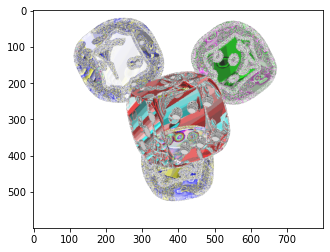

In [58]:
logarithmic_corrected = exposure.adjust_log(image=raw_image, gain=c)
plt.imshow(logarithmic_corrected)
plt.show()

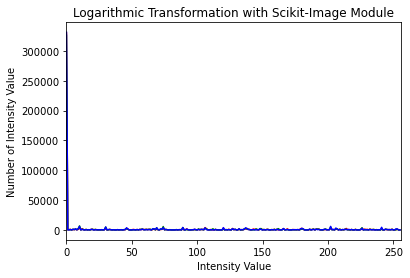

In [59]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([logarithmic_corrected], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Logarithmic Transformation with Scikit-Image Module')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()